In [1]:
import sys
import re
import string
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sb
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df.isnull().any()#Checking if there are any missing or null values present in the dataset.

type     False
posts    False
dtype: bool

In [5]:
df.shape #The shape of the dataset

(8675, 2)

In [6]:
df.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [7]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [31]:
graph = df['type'].value_counts()
plt.figure(figsize=(15,6))
sb.set(style='whitegrid')
sb.barplot(graph.index, graph.values, palette='Set1',alpha=1)
plt.xlabel('Personality types', fontsize=15)
plt.ylabel('No. of posts', fontsize=15)
plt.show()

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

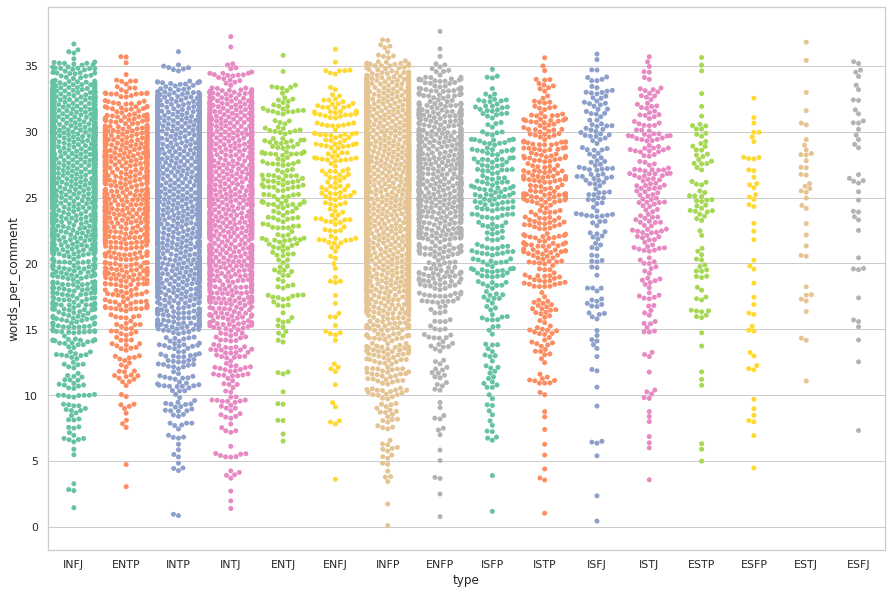

In [23]:
# Swarm Plot
df1 = df.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df1['words_per_comment'] = df1['posts'].apply(lambda x: len(x.split())/50)
df1['variance_of_word_counts'] = df1['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sb.set(style='whitegrid')
sb.swarmplot("type", "words_per_comment", data=df1, palette='Set2')

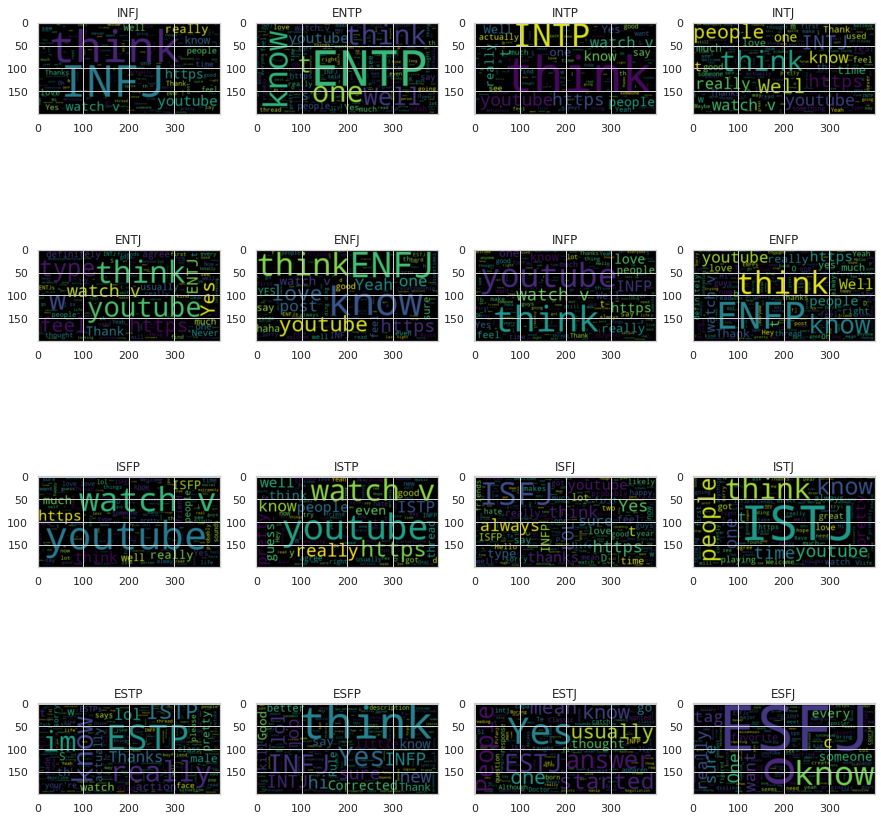

In [25]:
fig, ax = plt.subplots(len(df1['type'].unique()), sharex=True, figsize=(15,len(df1['type'].unique())))
k = 0
for i in df1['type'].unique():
    df_2 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_2['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [26]:
stopwords = set(STOPWORDS)
words =['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj', 'lot', 'time', 'love', 'actually', 'seem', 'need', 'infj', 'actually', 'pretty', 'sure', 'thought','type', 'one', 'even', 'someone', 'thing','make', 
            'now', 'see', 'things', 'feel', 'think', 'i', 'people', 'know', '-', "much", "something", "will", "find", "go", "going", "need", 'still', 'though', 
            'always', 'through', 'lot', 'time', 'love', 'really', 'want', 'way', 'never', 'find', 'say', 'it.', 'good', 'me.', 'many', 'first', 'wp', 'go', 
            'really', 'much', 'why', 'youtube', 'right', 'know', 'want', 'tumblr', 'great', 'say', 'well', 'people', 'will', 'something', 'way', 'sure', 
            'especially', 'thank', 'friend', 'good', 'ye', 'person', 'https', 'watch', 'yes', 'got', 'take', 'person', 'life', 'might', 'me', 'me,', 'around', 'best', 'try', 
            'maybe', 'probability', 'usually', 'sometimes', 'trying', 'read', 'us', 'may', 'use', 'work', ':)', 'said', 'two', 'makes', 'little', 'quite', 'u', 'intps', 'probably', 'made', 'it', 'seems', 'look', 'yeah',
           'different', 'come', 'it,', 'friends', 'entps', 'different', 'esfjs', 'look', 'infjs', 'estps', 'kind', 'intjs', 'enfjs', 
            'entjs', 'infps', 'every', 'long', 'tell', 'new', 'jpg']
for word in words:
    stopwords.add(word)

<Figure size 432x288 with 0 Axes>

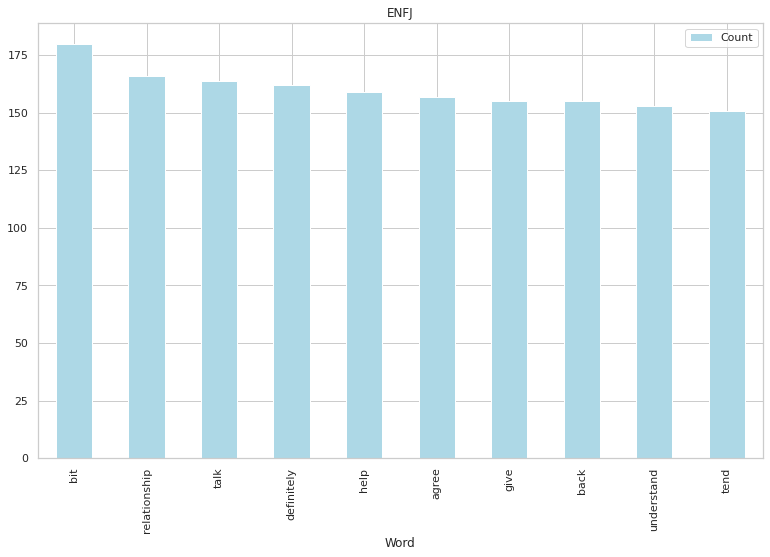

<Figure size 432x288 with 0 Axes>

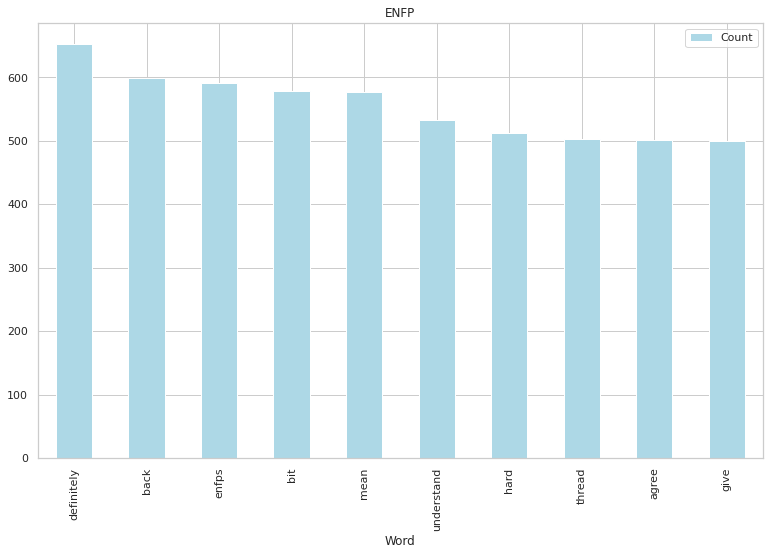

<Figure size 432x288 with 0 Axes>

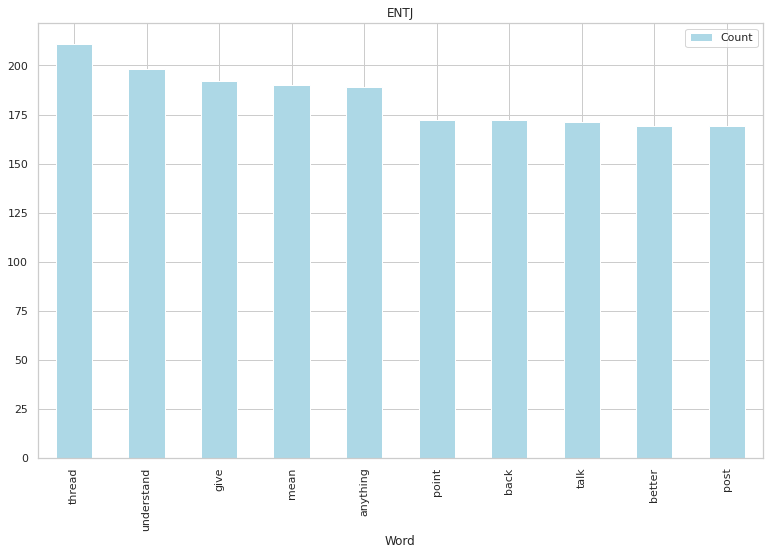

<Figure size 432x288 with 0 Axes>

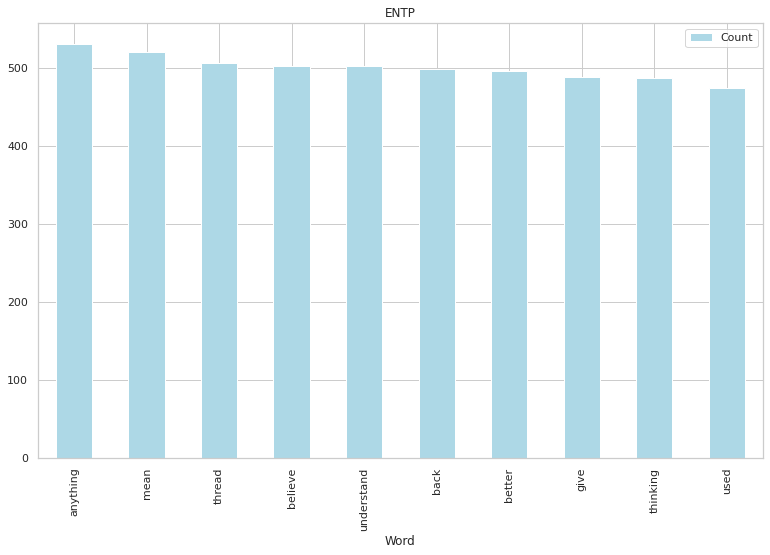

<Figure size 432x288 with 0 Axes>

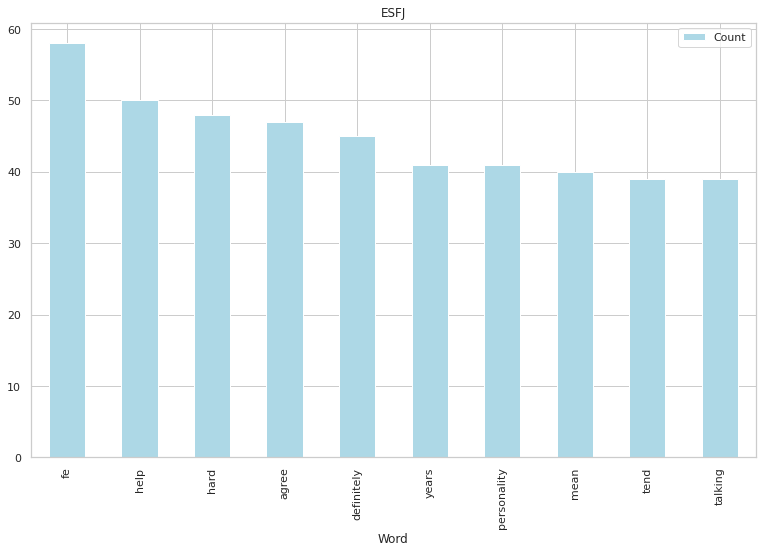

<Figure size 432x288 with 0 Axes>

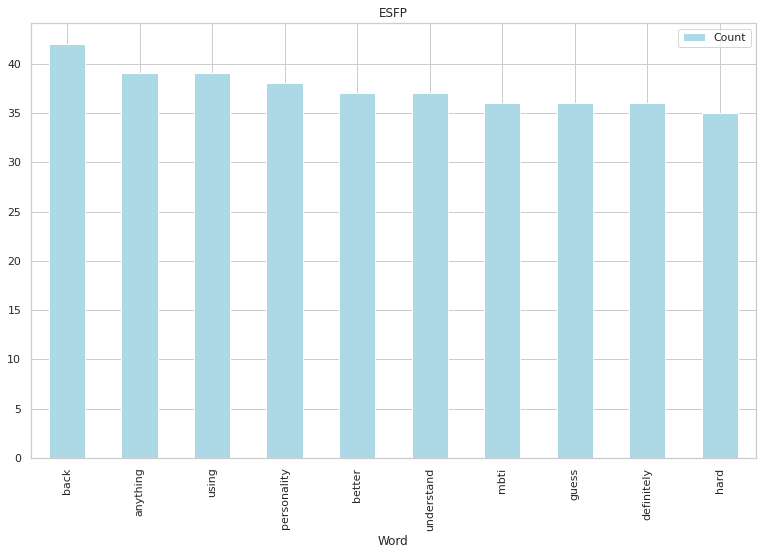

<Figure size 432x288 with 0 Axes>

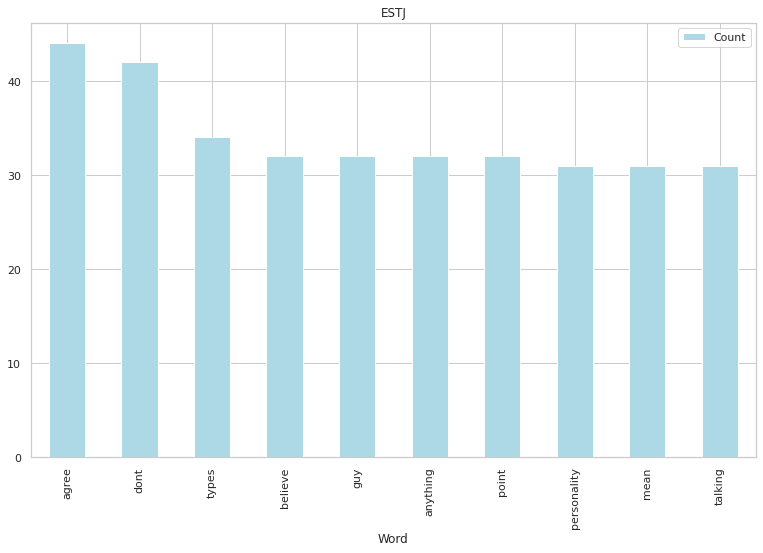

<Figure size 432x288 with 0 Axes>

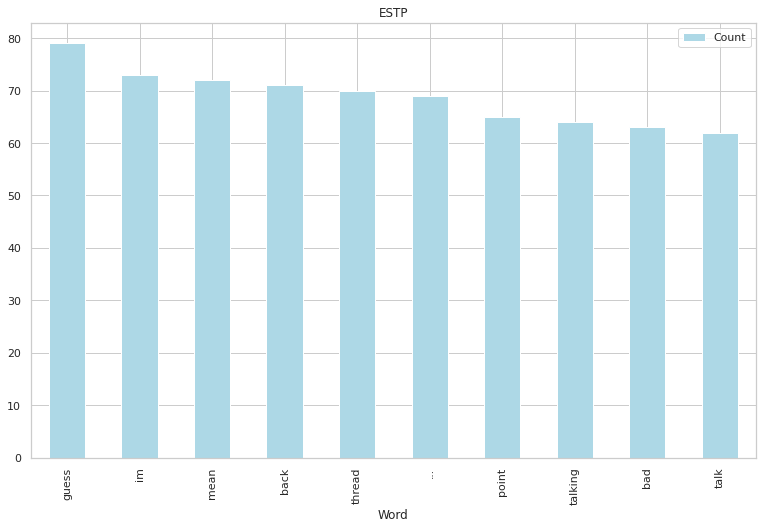

<Figure size 432x288 with 0 Axes>

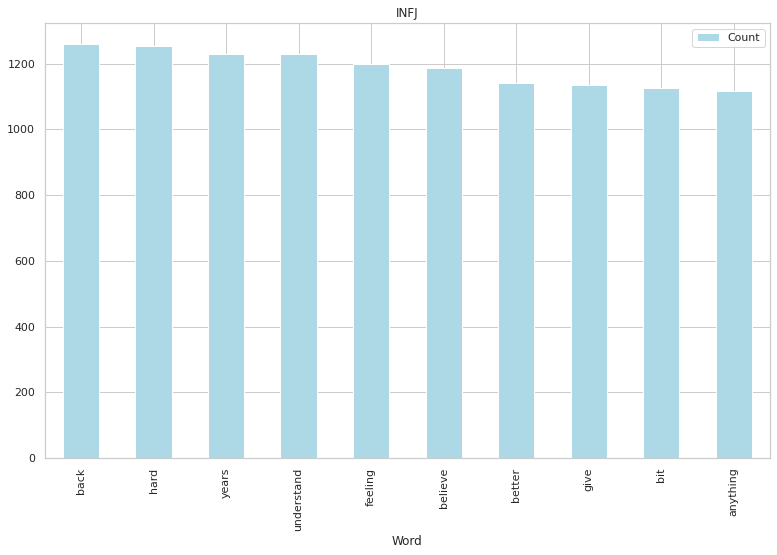

<Figure size 432x288 with 0 Axes>

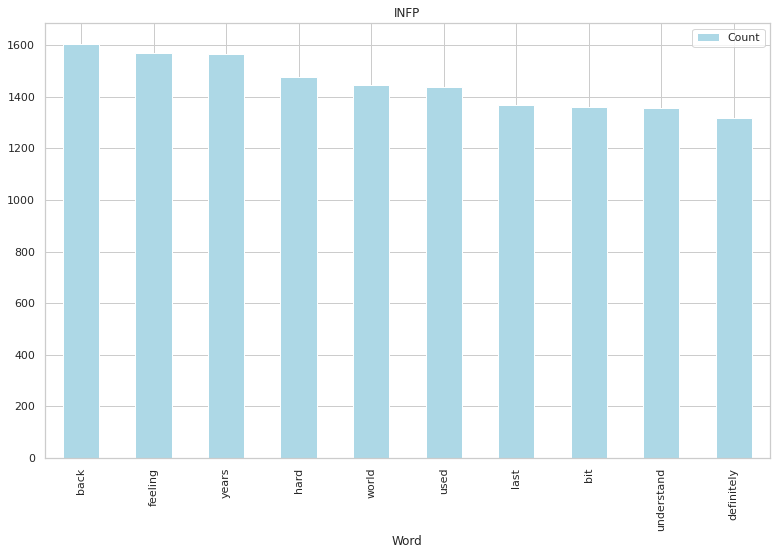

<Figure size 432x288 with 0 Axes>

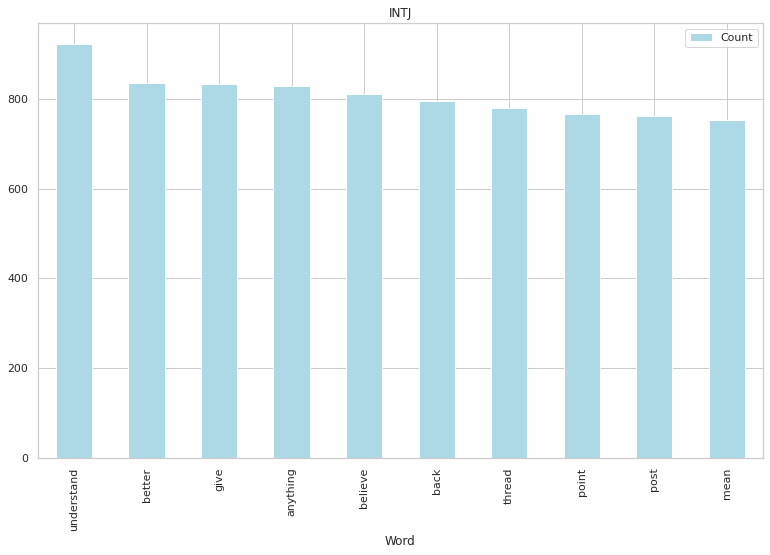

<Figure size 432x288 with 0 Axes>

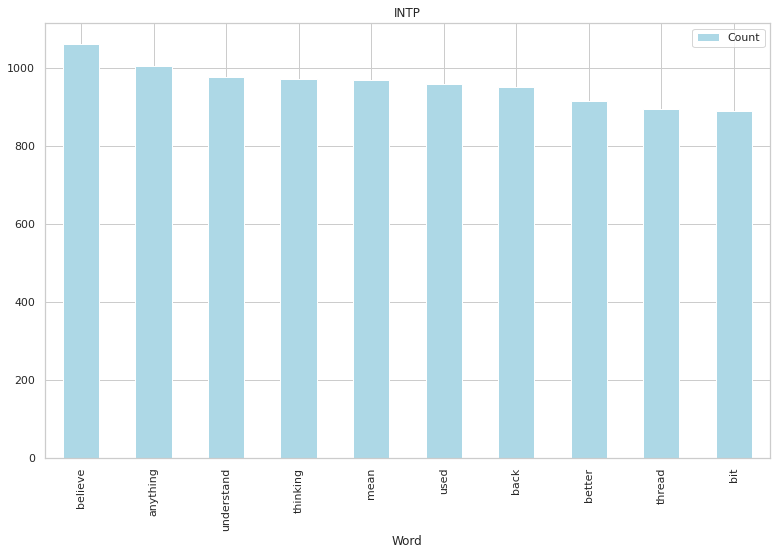

<Figure size 432x288 with 0 Axes>

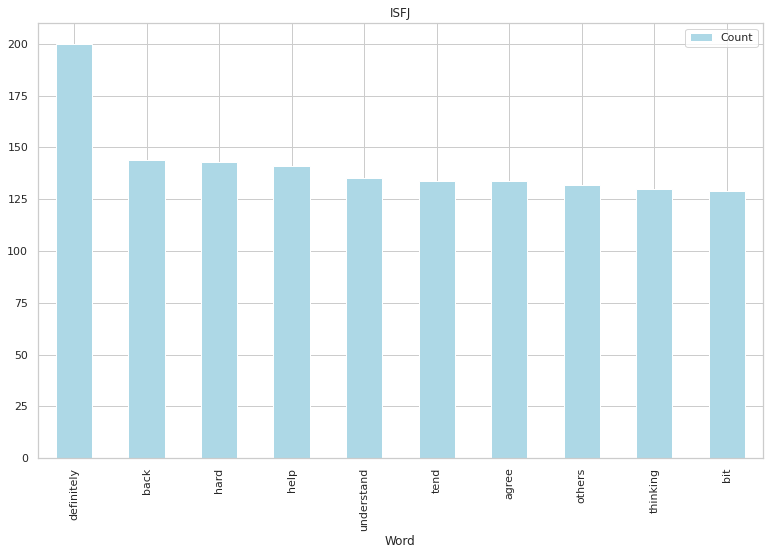

<Figure size 432x288 with 0 Axes>

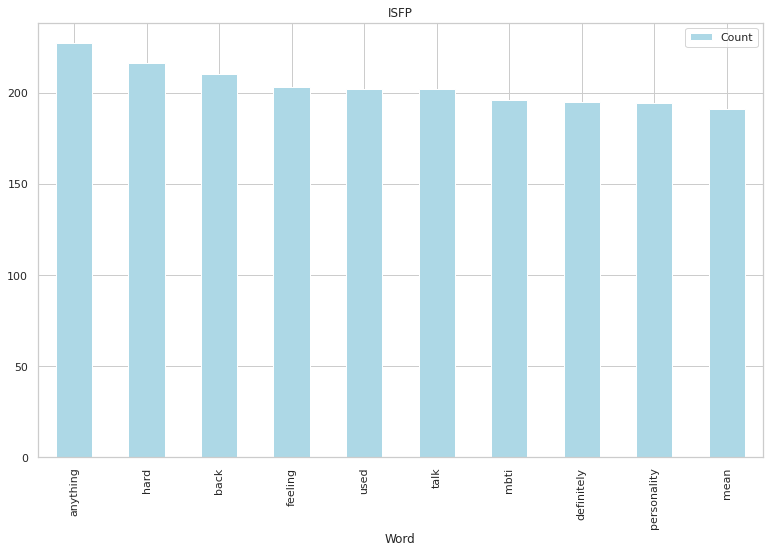

<Figure size 432x288 with 0 Axes>

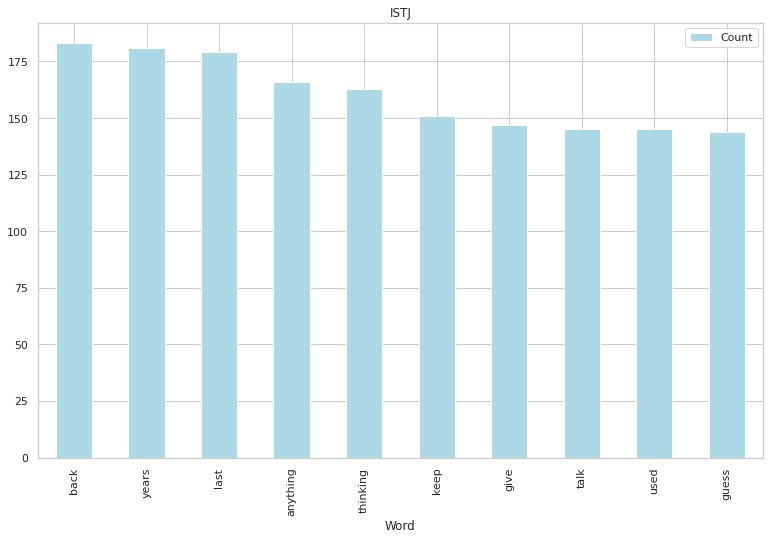

<Figure size 432x288 with 0 Axes>

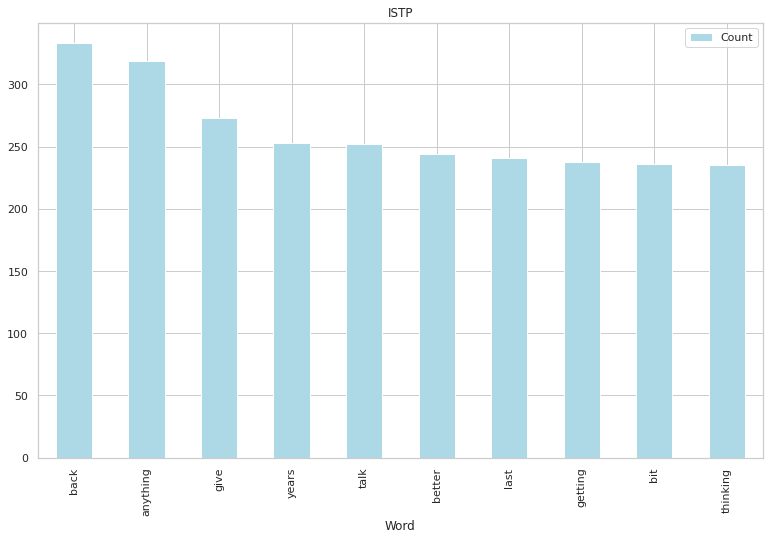

In [30]:
plt.rcParams.update({'figure.max_open_warning': 0})
i=0    
while i < len(types):
    for name in types:
        nameReturn = "".join(post for post in df1[df1["type"]== name].posts)
        nameReturn = nameReturn.lower()
        split = nameReturn.split() 
        filtered_words = [word for word in split if word not in stopwords]
        counter = Counter(filtered_words)
        most_occur = counter.most_common(10) 
        plt.figure()
        df = pd.DataFrame(most_occur, columns = ['Word', 'Count'])
        df.plot.bar(x='Word',y='Count', title=name, figsize=(13,8),color='lightblue')
        i+=1